In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as st
import numpy.linalg as ng
%matplotlib inline

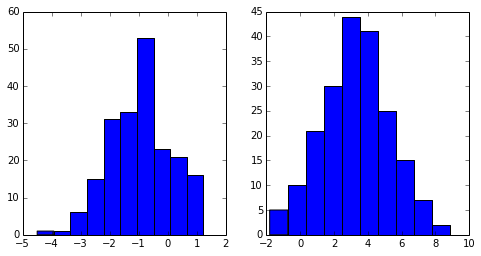

In [2]:
### generae samples
n= 200
x1 = np.random.normal(-1.0,1.0,n)
x2 = np.random.normal(3.5,2.0,n)
#### plot samples

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(x1)
plt.subplot(1,2,2)
plt.hist(x2)
plt.show()

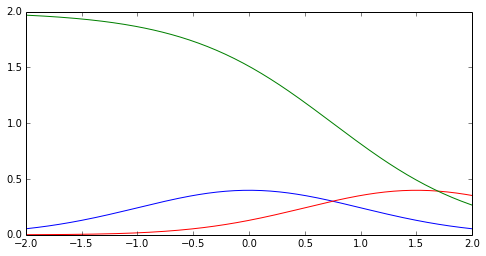

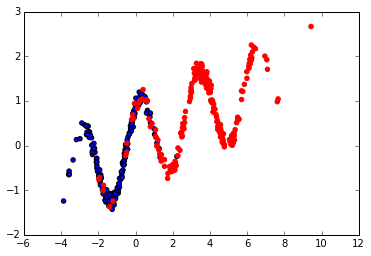

In [738]:
#### plot density

xxx = np.linspace(-2,2,n)

y1 = [st.norm.pdf(i,0,1) for i in xxx]
y2 = [st.norm.pdf(i,1.5,1) for i in xxx]
true_ratio  = [ y1[i]/(0.5*(y1[i]+y2[i])) for i in range(n)]

#### plot pdf
plt.figure(figsize=(8,4))
plt.plot(xxx,y1)
plt.plot(xxx,y2,c="red")
plt.plot(xxx,true_ratio,c="green")
plt.show()

### plot samples
def f(x):
    y = np.sin(2.0*x+1.0)+x*0.2+np.random.normal(0,0.1)
    return y

plt.scatter(x1,map(f,x1))
plt.scatter(x2,map(f,x2),color="red")


(200,)


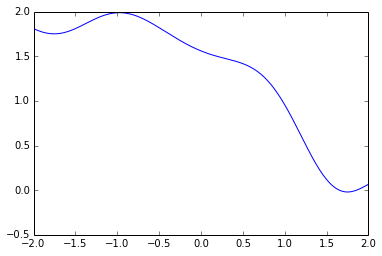

In [739]:
conc = np.concatenate([x1,x2])
my_list=[2.0]

for j in my_list:
    G = []
    for i in conc:
        ccc =np.array([[np.exp(-np.power(i-k,2)/j) for k in x2[0:200]]])
        G.append(np.dot(np.transpose(ccc),ccc))
    G = np.mean(G,0)
    h = np.mean(np.array([[np.exp(-np.power(i-k,2)/j) for k in x2[0:200]] for i in x1]),0)
    alpha =ng.solve(G+0.2,h)
    pred_ratio = [ np.dot(alpha,[np.exp(-np.power(i-k,2)/j) for k in x2[0:200]]) for i in xxx ]
    print np.array(pred_ratio).shape
    plt.plot(xxx,np.array(pred_ratio))
    plt.plot()
    


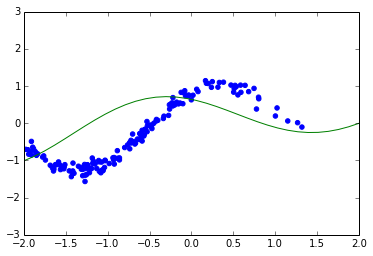

In [740]:
#### desingn matrix


def my_func(x):
    c1 = [ np.sin(0.5*j*x)for j in range(4)]
    c2 = [ np.cos(0.5*j*x)for j in range(4)]
    c = c1+c2
    c.append(1)
    return np.array(c)

a = [ my_func(i)for i in x2]

##### calucate pesdo_inverse
c = np.linalg.pinv(a)
b = np.dot(c,map(f,x2))

def pred(new):
    predd = np.array(my_func(new))
    return np.dot(predd,b)

x = np.linspace(-6,6,100)
pred_y = map(pred,x)
plt.plot(x,pred_y,color="green")
plt.scatter(x1,map(f,x1),color="blue")
#plt.scatter(x2,map(f,x2),color="red")
plt.ylim(-3,3)
plt.xlim(-2,2)
plt.show()

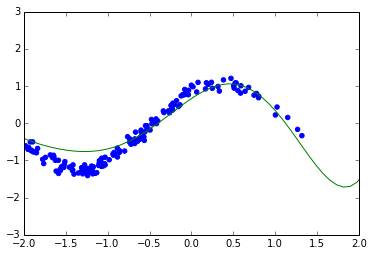

In [743]:
#### desingn matrix

W = np.zeros([len(x2),len(x2)])
for i in range(len(x2)):
    for j in range(len(x2)):
        if i==j:
            W[i,j]= np.power(st.norm.pdf(x2[i],0.0,1)/(0.6*st.norm.pdf(x2[i],0.0,1)+0.4*st.norm.pdf(x2[i],1.5,1)),0.5)

        
def my_func(x):
    c1 = [ np.sin(0.5*j*x)for j in range(4)]
    c2 = [ np.cos(0.5*j*x)for j in range(4)]
    c = c1+c2
    c.append(1)
    return np.array(c)

a = [ my_func(i)for i in x2]

##### calucate pesdo_inverse
ddd = np.dot(W,a)
c = sp.linalg.pinv2(np.dot(W,ddd))
b = np.dot(c,map(f,x2))

def pred(new):
    predd = np.array(my_func(new))
    return np.dot(predd,b)

x = np.linspace(-4,4,100)
pred_y = map(pred,x)
plt.plot(x,pred_y,color="green")
plt.scatter(x1,map(f,x1),color="blue")
####plt.scatter(x2,map(f,x2),color="red")
plt.ylim(-3,3)
plt.xlim(-2,2)
plt.show()